In [1]:
print("hello world!")

hello world!


Theory

1. can we use bagging for regression problem.

ans. Yes, bagging (Bootstrap Aggregating) can be used for regression problems. In fact, **Bagging Regressor** is a well-known ensemble method that improves the accuracy and stability of regression models.

### How Bagging Works in Regression:
1. It creates multiple bootstrap samples from the training data.
2. A regression model (e.g., Decision Tree Regressor) is trained on each sample.
3. The predictions from all models are averaged to produce the final output.

### Benefits of Using Bagging for Regression:
- **Reduces Variance**: Especially useful for models like Decision Trees, which tend to overfit.
- **Improves Stability**: More robust to noise in the dataset.
- **Handles Non-Linearity**: Can capture complex relationships in data.

### Example: Using Bagging with Decision Trees in Python
```python
from sklearn.ensemble import BaggingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# Generate synthetic regression data
X, y = make_regression(n_samples=1000, n_features=5, noise=0.1, random_state=42)

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create Bagging Regressor with Decision Tree as base model
bagging_reg = BaggingRegressor(
    base_estimator=DecisionTreeRegressor(),
    n_estimators=50,
    random_state=42
)

# Train the model
bagging_reg.fit(X_train, y_train)

# Predict and evaluate
y_pred = bagging_reg.predict(X_test)
mse = mean_squared_error(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
```

### When to Use Bagging for Regression?
- When your base model has high variance (e.g., Decision Trees).
- When you need better generalization.
- When your dataset is relatively small, and bootstrapping helps in making the most of the data.

Would you like an explanation on how bagging compares to boosting for regression?

2. what is the difference between multiple model training and single model training?

ans. The difference between **multiple model training** and **single model training** lies in the number of models used and how predictions are made.

---

### **1. Single Model Training**
- **Definition:** Involves training just **one** model on the dataset.
- **Examples:** Linear Regression, Decision Tree, Random Forest (single tree), Neural Network (single architecture).
- **Pros:**
  - Simpler and faster to train.
  - Easier to interpret (especially linear models and decision trees).
  - Requires less computational power.
- **Cons:**
  - Can suffer from **high variance** (overfitting) or **high bias** (underfitting).
  - Performance is limited to the chosen model's capability.

**Example in Python (Single Decision Tree for Regression):**
```python
from sklearn.tree import DecisionTreeRegressor
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split

# Generate data
X, y = make_regression(n_samples=1000, n_features=5, noise=0.1, random_state=42)

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a single Decision Tree model
model = DecisionTreeRegressor()
model.fit(X_train, y_train)

# Predict
y_pred = model.predict(X_test)
```

---

### **2. Multiple Model Training (Ensemble Learning)**
- **Definition:** Uses multiple models to improve performance by combining their predictions.
- **Types of Multiple Model Training:**
  - **Bagging:** Uses multiple instances of the same model trained on different subsets (e.g., Random Forest).
  - **Boosting:** Trains models sequentially, improving weak models (e.g., XGBoost, AdaBoost).
  - **Stacking:** Combines different models and uses another model to make final predictions.

- **Pros:**
  - Improves accuracy and generalization.
  - Reduces variance (e.g., Bagging) or bias (e.g., Boosting).
  - More robust to noise and outliers.

- **Cons:**
  - Requires more computational power.
  - Harder to interpret compared to a single model.
  - Takes longer to train.

**Example in Python (Bagging with Decision Trees for Regression):**
```python
from sklearn.ensemble import BaggingRegressor
from sklearn.tree import DecisionTreeRegressor

# Train a Bagging model with multiple Decision Trees
ensemble_model = BaggingRegressor(
    base_estimator=DecisionTreeRegressor(),
    n_estimators=50,
    random_state=42
)
ensemble_model.fit(X_train, y_train)

# Predict
y_pred_ensemble = ensemble_model.predict(X_test)
```

---

### **Key Differences:**
| Feature | Single Model Training | Multiple Model Training |
|---------|---------------------|----------------------|
| **Number of Models** | One | Multiple |
| **Performance** | Limited by a single model | Usually better (reduces variance/bias) |
| **Overfitting** | More prone to overfitting (especially complex models) | Less prone due to averaging effects |
| **Computational Cost** | Lower | Higher |
| **Interpretability** | Easier | Harder |

### **When to Use Which?**
- Use **single model training** when:
  - You need a quick, interpretable solution.
  - Your dataset is small and simple.
  - You are working with limited computational power.
  
- Use **multiple model training (ensemble methods)** when:
  - You want better performance and generalization.
  - Your base model suffers from overfitting or underfitting.
  - You are dealing with complex datasets.



3.  Explain the concept of feature randomness in Random Forest.

ans. ### **Feature Randomness in Random Forest**
Feature randomness is a key concept in **Random Forest**, which helps improve its accuracy and reduce overfitting. It refers to the process of **randomly selecting a subset of features** at each split in a decision tree.

---

### **How Feature Randomness Works in Random Forest**
1. **Bootstrapping Data:** Random Forest creates multiple decision trees by training each tree on a different subset of data (created using bootstrapping).
2. **Feature Subset Selection:** At each split (node) in a tree, instead of considering **all features**, only a **random subset** of features is chosen.
3. **Best Feature Selection:** From this subset, the best feature is selected based on criteria like **Gini Impurity (for classification)** or **Mean Squared Error (for regression)**.
4. **Final Prediction:**
   - For classification, Random Forest takes a **majority vote** from all trees.
   - For regression, it takes the **average** of all tree predictions.

---

### **Why Use Feature Randomness?**
- **Reduces Overfitting:** By preventing trees from always choosing the same dominant feature, the model generalizes better.
- **Increases Diversity Among Trees:** Different trees learn different patterns, making the ensemble more robust.
- **Improves Efficiency:** Selecting a subset of features at each split makes training faster compared to evaluating all features.

---

### **Feature Randomness Parameter in Scikit-Learn**
In **Scikit-Learn’s RandomForestClassifier & RandomForestRegressor**, feature randomness is controlled by the **`max_features`** parameter:

- **max_features="auto"** (default for classification) → Uses **sqrt(number of features)**.
- **max_features="sqrt"** → Uses **square root of total features**.
- **max_features="log2"** → Uses **log base 2 of total features**.
- **max_features=None** → Uses **all features** (removes randomness).

---

### **Example in Python**
```python
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split

# Load dataset
iris = load_iris()
X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, test_size=0.2, random_state=42)

# Train Random Forest with feature randomness
rf_model = RandomForestClassifier(n_estimators=100, max_features="sqrt", random_state=42)
rf_model.fit(X_train, y_train)

# Feature Importance
print(rf_model.feature_importances_)
```

---

### **Key Takeaways**
✔ **Feature randomness** helps prevent dominant features from being repeatedly chosen.  
✔ It **enhances model generalization** and reduces overfitting.  
✔ **Adjusting `max_features`** can control the level of randomness and model complexity.  

4. What is OOB (Out-of-Bag) Score.

ans. ### **Out-of-Bag (OOB) Score in Random Forest**
**Out-of-Bag (OOB) Score** is a built-in validation technique used in **Random Forest** to estimate model performance without needing a separate validation set.

---

### **How OOB Score Works**
1. **Bootstrap Sampling:**  
   - Each tree in a Random Forest is trained on a **random subset** of the data (bootstrapped sample).
   - Around **63%** of the training data is used for training each tree.
   - The remaining **37% of the data (OOB samples)** is **not** used in training that specific tree.

2. **Making Predictions with OOB Data:**  
   - Since OOB samples were **not seen** by a specific tree, they can be used to test the model’s performance.
   - Each OOB sample is predicted using **only the trees that did not train on it**.
   - The final prediction for each OOB sample is determined by:
     - **Majority vote** (for classification).
     - **Average prediction** (for regression).

3. **Computing the OOB Score:**  
   - The accuracy (for classification) or error metric (for regression) of the OOB predictions is calculated.
   - This provides an estimate of how well the model generalizes.

---

### **Why is OOB Score Useful?**
✔ **No Need for a Separate Validation Set** → Saves data for training.  
✔ **Reduces Overfitting Risk** → Since OOB estimates generalization performance.  
✔ **Gives an Unbiased Performance Estimate** → More reliable than training accuracy.  

---

### **Example in Python: OOB Score in Random Forest**
```python
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split

# Load dataset
iris = load_iris()
X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, test_size=0.2, random_state=42)

# Train Random Forest with OOB scoring
rf_model = RandomForestClassifier(n_estimators=100, oob_score=True, random_state=42)
rf_model.fit(X_train, y_train)

# Print OOB Score
print(f"OOB Score: {rf_model.oob_score_:.4f}")
```

---

### **OOB Score vs. Cross-Validation**
| Feature | OOB Score | Cross-Validation |
|---------|----------|-----------------|
| **Data Usage** | Uses only training data | Splits data into k-folds |
| **Computational Cost** | Lower (only needs one training run) | Higher (trains model multiple times) |
| **Bias-Variance Tradeoff** | Slightly more biased | Less biased (more reliable estimate) |

---

### **Key Takeaways**
✅ **OOB Score helps estimate model performance without a validation set**  
✅ **It works well with Random Forest due to bootstrapping**  
✅ **Lower computational cost compared to cross-validation**  

5. How can you measure the importance of features in a Random Forest model.

ans. ### **Measuring Feature Importance in Random Forest**
Random Forest provides a built-in way to measure **feature importance**, helping us understand which features contribute the most to predictions.

---

### **Methods to Measure Feature Importance**
1. **Mean Decrease in Impurity (MDI) – Default Method**
2. **Permutation Importance (Mean Decrease in Accuracy)**
3. **SHAP (SHapley Additive exPlanations) – Advanced Method**

---

### **1. Mean Decrease in Impurity (MDI) – Default Feature Importance**
- Based on how much a feature **reduces impurity** (Gini Impurity for classification, MSE for regression) across all trees.
- Features that result in **larger decreases in impurity** are considered more important.

**Python Example:**
```python
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import load_iris

# Load dataset
iris = load_iris()
X, y = iris.data, iris.target

# Train Random Forest
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X, y)

# Get feature importances
importances = rf_model.feature_importances_
for feature, importance in zip(iris.feature_names, importances):
    print(f"{feature}: {importance:.4f}")
```
🔹 **Pros:** Fast, built-in, easy to use.  
🔹 **Cons:** Can be biased towards features with more categories or high cardinality.

---

### **2. Permutation Importance (Mean Decrease in Accuracy)**
- Measures how much **shuffling a feature** impacts model accuracy.
- If randomly shuffling a feature **significantly drops accuracy**, it is an important feature.

**Python Example:**
```python
from sklearn.inspection import permutation_importance

# Compute permutation importance
perm_importance = permutation_importance(rf_model, X, y, n_repeats=10, random_state=42)

# Display results
for feature, importance in zip(iris.feature_names, perm_importance.importances_mean):
    print(f"{feature}: {importance:.4f}")
```
🔹 **Pros:** More reliable than MDI, works for any model.  
🔹 **Cons:** Computationally expensive.

---

### **3. SHAP (SHapley Additive exPlanations) – Advanced Feature Importance**
- Based on **game theory**, SHAP explains each feature’s contribution to the prediction.
- Provides a **global** and **local** view of feature importance.

**Python Example:**
```python
import shap

# Create SHAP explainer
explainer = shap.Explainer(rf_model, X)
shap_values = explainer(X)

# Visualize feature importance
shap.summary_plot(shap_values, X, feature_names=iris.feature_names)
```
🔹 **Pros:** Most accurate, interpretable.  
🔹 **Cons:** Computationally intensive.

---

### **Comparison of Feature Importance Methods**
| Method | Pros | Cons |
|--------|------|------|
| **MDI (Gini/MSE Reduction)** | Fast, built-in | Biased towards high-cardinality features |
| **Permutation Importance** | Model-agnostic, unbiased | Computationally expensive |
| **SHAP Values** | Most interpretable | Slowest |

---

### **Key Takeaways**
✅ **MDI (Default) is fast and built-in but biased**  
✅ **Permutation Importance is more reliable but slower**  
✅ **SHAP is the best for interpretability but computationally expensive**  

6. Explain the working principle of a Bagging Classifier.

ans. ### **Working Principle of a Bagging Classifier**
A **Bagging Classifier** (Bootstrap Aggregating Classifier) is an **ensemble learning** technique that improves the accuracy and stability of machine learning models by reducing variance and preventing overfitting.

---

### **How a Bagging Classifier Works**
The Bagging Classifier follows these steps:

1. **Bootstrap Sampling (Data Resampling)**  
   - Randomly selects multiple **subsets of data** (with replacement) from the training dataset.  
   - Each subset is slightly different from the original dataset.

2. **Train Multiple Base Models**  
   - A **separate classifier** (e.g., Decision Tree, SVM, etc.) is trained on each subset.  
   - These models learn patterns independently.

3. **Aggregate Predictions (Voting/ Averaging)**  
   - For **classification**:
     - **Majority voting** is used (the class predicted most frequently is chosen).
   - For **regression**:
     - **Averaging** is used (the mean of all model predictions is taken).

4. **Final Prediction**  
   - The aggregated output from all models becomes the final prediction.

---

### **Advantages of a Bagging Classifier**
✔ **Reduces Variance** – Less sensitive to overfitting.  
✔ **Improves Accuracy** – Combines multiple weak models into a strong one.  
✔ **Handles Noisy Data** – Since each model learns from different subsets.  
✔ **Works with Any Base Model** – Can be applied to Decision Trees, SVMs, etc.

---

### **Example: Bagging Classifier in Python**
```python
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Load dataset
iris = load_iris()
X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, test_size=0.2, random_state=42)

# Create Bagging Classifier with Decision Trees
bagging_clf = BaggingClassifier(
    base_estimator=DecisionTreeClassifier(),
    n_estimators=50,
    random_state=42
)

# Train the model
bagging_clf.fit(X_train, y_train)

# Predict and evaluate
y_pred = bagging_clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

print(f"Bagging Classifier Accuracy: {accuracy:.4f}")
```

---

### **Bagging Classifier vs. Boosting**
| Feature | Bagging | Boosting |
|---------|---------|---------|
| **Base Model Training** | Independent | Sequential (each model corrects previous errors) |
| **Goal** | Reduce variance | Reduce bias |
| **Complexity** | Lower | Higher |
| **Example Algorithm** | Random Forest | AdaBoost, XGBoost |

---

### **Key Takeaways**
✅ **Bagging Classifier trains multiple models on different data subsets**  
✅ **Reduces variance and prevents overfitting**  
✅ **Uses majority voting (classification) or averaging (regression) for final prediction**  

7. How do you evaluate a Bagging Classifier’s performance.

ans. ### **Evaluating a Bagging Classifier’s Performance**
To assess how well a **Bagging Classifier** performs, we use various **metrics and validation techniques**.

---

## **1️⃣ Performance Metrics**
The choice of evaluation metric depends on whether the problem is **classification** or **regression**.

### **For Classification Problems**
📌 **Common Metrics:**
- **Accuracy** → Measures overall correctness.
- **Precision & Recall** → Useful for imbalanced datasets.
- **F1-Score** → Balances precision and recall.
- **ROC-AUC Score** → Evaluates model discrimination ability.

🔹 **Example: Compute Classification Metrics**
```python
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report

# Load dataset
iris = load_iris()
X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, test_size=0.2, random_state=42)

# Train Bagging Classifier
bagging_clf = BaggingClassifier(base_estimator=DecisionTreeClassifier(), n_estimators=50, random_state=42)
bagging_clf.fit(X_train, y_train)

# Predict
y_pred = bagging_clf.predict(X_test)

# Evaluate
print(f"Accuracy: {accuracy_score(y_test, y_pred):.4f}")
print(classification_report(y_test, y_pred))
```

---

### **For Regression Problems**
📌 **Common Metrics:**
- **Mean Absolute Error (MAE)** → Measures absolute differences.
- **Mean Squared Error (MSE)** → Penalizes larger errors.
- **R² Score** → Measures how well predictions fit actual values.

🔹 **Example: Compute Regression Metrics**
```python
from sklearn.ensemble import BaggingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.datasets import make_regression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Generate data
X, y = make_regression(n_samples=1000, n_features=5, noise=0.1, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train Bagging Regressor
bagging_reg = BaggingRegressor(base_estimator=DecisionTreeRegressor(), n_estimators=50, random_state=42)
bagging_reg.fit(X_train, y_train)

# Predict
y_pred = bagging_reg.predict(X_test)

# Evaluate
print(f"MAE: {mean_absolute_error(y_test, y_pred):.4f}")
print(f"MSE: {mean_squared_error(y_test, y_pred):.4f}")
print(f"R² Score: {r2_score(y_test, y_pred):.4f}")
```

---

## **2️⃣ Validation Techniques**
To ensure a reliable evaluation, use **cross-validation** and **OOB (Out-of-Bag) score**.

### **Cross-Validation**
- Splits data into **k-folds** and trains the model multiple times.
- Reduces dependency on a single train-test split.

🔹 **Example: K-Fold Cross-Validation**
```python
from sklearn.model_selection import cross_val_score

# Perform 5-fold cross-validation
cv_scores = cross_val_score(bagging_clf, X_train, y_train, cv=5, scoring='accuracy')

print(f"Cross-Validation Accuracy: {cv_scores.mean():.4f}")
```

---

### **Out-of-Bag (OOB) Score**
- Bagging naturally supports **OOB evaluation** (since some data is left out in bootstrapping).
- Provides an **unbiased** estimate of model performance without needing extra validation data.

🔹 **Enable OOB Score in Bagging**
```python
bagging_clf_oob = BaggingClassifier(base_estimator=DecisionTreeClassifier(), n_estimators=50, oob_score=True, random_state=42)
bagging_clf_oob.fit(X_train, y_train)

# Get OOB Score
print(f"OOB Score: {bagging_clf_oob.oob_score_:.4f}")
```

---

## **3️⃣ Comparing with Other Models**
A Bagging Classifier should be compared with:
- **Base Model (e.g., Decision Tree, SVM, Logistic Regression)**
- **Other Ensemble Methods (Boosting, Random Forest, Stacking)**

🔹 **Example: Compare with Decision Tree**
```python
from sklearn.tree import DecisionTreeClassifier

# Train a single Decision Tree
dt_clf = DecisionTreeClassifier(random_state=42)
dt_clf.fit(X_train, y_train)

# Predict and evaluate
y_pred_dt = dt_clf.predict(X_test)
print(f"Decision Tree Accuracy: {accuracy_score(y_test, y_pred_dt):.4f}")
print(f"Bagging Classifier Accuracy: {accuracy_score(y_test, y_pred):.4f}")
```
📌 **Expected Outcome:** Bagging should perform better by reducing overfitting.

---

## **Key Takeaways**
✅ **Use accuracy, F1-score (classification) or MSE, R² (regression) for evaluation.**  
✅ **Cross-validation and OOB Score provide better generalization estimates.**  
✅ **Compare Bagging with base models and other ensemble methods.**  

8. How does a Bagging Regressor work.

ans. ## **How a Bagging Regressor Works**
A **Bagging Regressor** is an **ensemble learning method** that improves regression performance by combining multiple weak models trained on different subsets of data. It reduces **variance**, prevents **overfitting**, and improves **stability**.

---

### **Working Principle of Bagging Regressor**
A **Bagging Regressor** follows these steps:

1. **Bootstrap Sampling (Random Data Selection)**  
   - Multiple **random subsets** of the training data are created **with replacement**.
   - Each subset is different but may have overlapping samples.

2. **Train Multiple Base Regressors**  
   - A separate **base regressor** (e.g., Decision Tree, Linear Regression) is trained on each subset.
   - These models learn independently.

3. **Aggregate Predictions (Averaging Method)**  
   - Each regressor makes a prediction for a given input.
   - The final prediction is **the average of all predictions** from individual models.

\[
\hat{y} = \frac{1}{n} \sum_{i=1}^{n} \hat{y}_i
\]

Where:  
- \( \hat{y} \) = Final prediction  
- \( n \) = Number of regressors  
- \( \hat{y}_i \) = Prediction from the \( i^{th} \) model  

---

## **Example: Bagging Regressor in Python**
Let’s implement a **Bagging Regressor** using **Decision Tree Regressors** as base models.

```python
from sklearn.ensemble import BaggingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Generate synthetic regression data
X, y = make_regression(n_samples=1000, n_features=5, noise=0.2, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a Bagging Regressor with Decision Trees
bagging_reg = BaggingRegressor(base_estimator=DecisionTreeRegressor(), n_estimators=50, random_state=42)

# Train the model
bagging_reg.fit(X_train, y_train)

# Make predictions
y_pred = bagging_reg.predict(X_test)

# Evaluate performance
print(f"MAE: {mean_absolute_error(y_test, y_pred):.4f}")
print(f"MSE: {mean_squared_error(y_test, y_pred):.4f}")
print(f"R² Score: {r2_score(y_test, y_pred):.4f}")
```

---

## **Advantages of Bagging Regressor**
✔ **Reduces Variance** → More stable predictions.  
✔ **Prevents Overfitting** → Less sensitive to small changes in data.  
✔ **Works with Any Regressor** → Decision Trees, SVMs, Neural Networks, etc.  
✔ **Handles Noisy Data Well** → Different subsets reduce noise effects.

---

## **Bagging Regressor vs. Other Methods**
| Method | How It Works | Strengths | Weaknesses |
|--------|-------------|-----------|------------|
| **Bagging Regressor** | Trains multiple models on bootstrapped subsets & averages predictions | Reduces variance, prevents overfitting | Not great for high bias models |
| **Random Forest Regressor** | Similar to Bagging, but selects random features for each tree | Better feature selection, often more accurate | More computationally expensive |
| **Boosting (e.g., AdaBoost, XGBoost)** | Sequentially trains models, each improving previous errors | Reduces bias & variance, high accuracy | More prone to overfitting, slower |

---

## **Key Takeaways**
✅ **Bagging Regressor improves stability by averaging multiple regressors**  
✅ **It reduces variance and prevents overfitting**  
✅ **Best used when individual regressors overfit but have low bias**

9. What is the main advantage of ensemble techniques.

ans. ### **Main Advantage of Ensemble Techniques**
The primary advantage of **ensemble techniques** is that they **combine multiple models** to improve overall performance, making predictions more **accurate, robust, and stable** compared to individual models.  

---

### **Key Benefits of Ensemble Techniques**
✅ **Higher Accuracy** → Aggregating multiple models reduces errors.  
✅ **Reduced Overfitting** → Combines weak learners to generalize better.  
✅ **Lower Variance** → Bagging techniques reduce model instability.  
✅ **Lower Bias** → Boosting techniques correct model bias sequentially.  
✅ **Works with Any Model** → Can combine weak or strong models.  

---

### **Why Ensemble Learning Works**
- A single model might **overfit** or **underfit**, but combining multiple models helps balance **bias and variance**.  
- Different models capture **different patterns**, leading to **better generalization**.  
- In noisy datasets, ensemble methods **smooth out errors** from individual models.

---

### **Examples of Ensemble Techniques**
| **Ensemble Method** | **How It Works** | **Best Use Case** |
|----------------------|------------------|--------------------|
| **Bagging (Bootstrap Aggregating)** | Trains multiple models independently & averages predictions | Reduces variance (e.g., Random Forest) |
| **Boosting** | Trains models sequentially, correcting previous mistakes | Reduces bias (e.g., AdaBoost, XGBoost) |
| **Stacking** | Combines multiple models with a meta-model | Improves predictive power |

---

### **Key Takeaway**  
🔹 **Ensemble techniques enhance accuracy, reduce overfitting, and improve stability by combining multiple models.**  

10. What is the main challenge of ensemble methods.

ans. ### **Main Challenge of Ensemble Methods**  
While **ensemble methods** improve accuracy and robustness, they come with some **challenges** that can make them difficult to implement.

---

## **Key Challenges of Ensemble Methods**  
### **1️⃣ Increased Computational Complexity**  
- **Training multiple models** requires more time and computational resources.  
- Some ensembles (e.g., **Boosting, Stacking**) take longer compared to single models.  
- **Solution:** Use parallel processing (for Bagging, Random Forest) or optimized implementations (e.g., XGBoost).  

### **2️⃣ Difficult to Interpret & Explain**  
- Individual models in an ensemble are easy to interpret (e.g., Decision Trees), but **combining multiple models makes interpretation complex**.  
- **Solution:** Use **feature importance** techniques (e.g., SHAP, Permutation Importance).  

### **3️⃣ Risk of Overfitting (Especially in Boosting)**  
- **Boosting methods (like XGBoost, AdaBoost)** focus heavily on correcting errors, which can lead to overfitting on training data.  
- **Solution:** Use **early stopping, regularization (learning rate, max depth), and cross-validation**.  

### **4️⃣ Requires Careful Hyperparameter Tuning**  
- Bagging and Boosting require tuning parameters like:
  - **Number of base models (n_estimators)**
  - **Learning rate (for Boosting)**
  - **Depth of base models (for Random Forest, Gradient Boosting)**
- **Solution:** Use **Grid Search, Random Search, or Bayesian Optimization**.  

### **5️⃣ Requires More Memory & Storage**  
- **Multiple models** require additional storage and memory.  
- **Solution:** Optimize models using **pruning or model compression techniques**.  

---

## **Key Takeaway**  
✔ **Ensemble methods improve accuracy but require more resources, tuning, and careful implementation to avoid overfitting.**  

11. Explain the key idea behind ensemble techniques.

ans. ### **Key Idea Behind Ensemble Techniques**  
The **core idea of ensemble techniques** is to **combine multiple models** to improve accuracy, stability, and generalization compared to a single model.

---

## **How Ensemble Techniques Work**
Instead of relying on a **single weak or strong model**, ensemble methods use multiple models to capture **different patterns and relationships** in the data. This reduces **bias, variance, and noise**, leading to a **more reliable and accurate** final prediction.

---

## **Why Ensemble Methods Work**
### ✅ **1️⃣ Reducing Variance (Bagging)**
- **Problem:** High variance models (e.g., Decision Trees) can overfit.  
- **Solution:** Train multiple models on **random subsets** of the data and **average predictions** (e.g., **Random Forest**).  

### ✅ **2️⃣ Reducing Bias (Boosting)**
- **Problem:** High bias models (e.g., Logistic Regression) may underfit.  
- **Solution:** Train models **sequentially**, where each model **corrects the mistakes** of the previous one (e.g., **AdaBoost, XGBoost**).  

### ✅ **3️⃣ Improving Robustness (Stacking)**
- **Problem:** A single model might miss patterns.  
- **Solution:** Use **different models (e.g., SVM, Neural Networks, Decision Trees)** and combine their outputs with a **meta-model** for better predictions.  

---

## **Types of Ensemble Techniques**
| **Method**  | **How It Works**  | **Example Algorithms**  |
|------------|----------------|--------------------|
| **Bagging (Bootstrap Aggregating)** | Trains multiple models independently on random data subsets and averages predictions | Random Forest, Bagging Classifier |
| **Boosting** | Trains models sequentially, with each new model focusing on correcting previous errors | AdaBoost, XGBoost, Gradient Boosting |
| **Stacking** | Combines multiple different models using a meta-model for better accuracy | Stacking Classifier, Super Learner |

---

## **Key Takeaway**  
✔ **Ensemble techniques combine multiple models to create a more accurate and stable prediction system by reducing variance, bias, and noise.**

12. What is a Random Forest Classifier.

Ans. ### **What is a Random Forest Classifier?**  
A **Random Forest Classifier** is an **ensemble learning algorithm** that combines multiple **Decision Trees** to improve classification accuracy, reduce overfitting, and enhance model stability.  

---

## **How Does a Random Forest Classifier Work?**
### 🔹 **1️⃣ Bootstrapping (Bagging Technique)**  
- The dataset is randomly **split into multiple subsets** (with replacement).  
- Each subset is used to train a different **Decision Tree**.  

### 🔹 **2️⃣ Feature Randomness (Random Subset of Features for Each Split)**  
- Unlike a single Decision Tree, **Random Forest randomly selects a subset of features** at each split, making trees more diverse.  

### 🔹 **3️⃣ Aggregation (Majority Voting for Classification)**  
- Each Decision Tree makes a prediction.  
- The final classification is determined by **majority voting** across all trees.  

🔹 **Final Prediction:**  
\[
\hat{y} = \text{mode}(y_1, y_2, ..., y_n)
\]  
where \( y_1, y_2, ..., y_n \) are predictions from individual trees.

---

## **Advantages of Random Forest Classifier**
✔ **Reduces Overfitting** → More stable than a single Decision Tree.  
✔ **Handles Large Datasets & High-Dimensional Data** → Works well with many features.  
✔ **Can Handle Missing Data** → Some trees may still work well even with missing values.  
✔ **Feature Importance Ranking** → Helps identify the most important features.  

---

## **Random Forest Classifier Example (Python)**
```python
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Load dataset
iris = load_iris()
X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, test_size=0.2, random_state=42)

# Train Random Forest Classifier
rf_clf = RandomForestClassifier(n_estimators=100, random_state=42)
rf_clf.fit(X_train, y_train)

# Predict
y_pred = rf_clf.predict(X_test)

# Evaluate
print(f"Accuracy: {accuracy_score(y_test, y_pred):.4f}")
```

---

## **Key Takeaway**
✅ **Random Forest Classifier is a powerful ensemble model that combines multiple Decision Trees using bagging to improve accuracy and reduce overfitting.**  

13. What are the main types of ensemble techniques.

ans. ### **Main Types of Ensemble Techniques**  
Ensemble learning combines multiple models to improve accuracy, reduce overfitting, and enhance stability. The main types of ensemble techniques are:

---

## **1️⃣ Bagging (Bootstrap Aggregating)**
✔ **Goal:** Reduce variance and prevent overfitting.  
✔ **How it works:**  
- Creates **multiple subsets** of the data using **bootstrap sampling** (random sampling with replacement).  
- Trains multiple models **independently** on these subsets.  
- Combines results using **majority voting (classification)** or **averaging (regression)**.  

✔ **Example Algorithms:**  
- **Random Forest** (multiple Decision Trees trained on different subsets)  
- **Bagging Classifier & Bagging Regressor** (can be used with any model)  

🔹 **Best for:** High-variance models (e.g., Decision Trees).  

---

## **2️⃣ Boosting**  
✔ **Goal:** Reduce bias by improving weak learners sequentially.  
✔ **How it works:**  
- Models are trained **sequentially**, with each new model focusing on **correcting the errors** of the previous ones.  
- Uses **weighted learning**, giving more weight to misclassified samples.  
- Final prediction is a **weighted sum** of all models.  

✔ **Example Algorithms:**  
- **AdaBoost (Adaptive Boosting)** – Assigns higher weights to misclassified samples.  
- **Gradient Boosting** – Uses gradient descent to minimize errors.  
- **XGBoost** – An optimized version of Gradient Boosting.  
- **LightGBM & CatBoost** – Faster and more efficient boosting methods.  

🔹 **Best for:** High-bias models (e.g., Logistic Regression, Decision Stumps).  

---

## **3️⃣ Stacking (Stacked Generalization)**  
✔ **Goal:** Improve accuracy by combining different types of models.  
✔ **How it works:**  
- Uses multiple **different base models** (e.g., Decision Tree, SVM, Neural Network).  
- Outputs from base models are combined by a **meta-model** (e.g., Logistic Regression) that learns to make the final prediction.  

✔ **Example Algorithms:**  
- **Stacking Classifier & Stacking Regressor** (from `sklearn.ensemble`).  

🔹 **Best for:** When diverse models are available, and computational power is sufficient.  

---

## **4️⃣ Voting (for Classification) & Averaging (for Regression)**  
✔ **Goal:** Combine predictions from different models to improve robustness.  
✔ **How it works:**  
- **Voting (Classification)**:  
  - **Hard voting** – Takes the most common prediction (majority vote).  
  - **Soft voting** – Takes the weighted average of predicted probabilities.  
- **Averaging (Regression):** Computes the average of predictions from multiple models.  

✔ **Example Algorithms:**  
- **Voting Classifier & Voting Regressor** (from `sklearn.ensemble`).  

🔹 **Best for:** When using different types of models with similar performance.  

---

## **Summary: Comparing Ensemble Techniques**
| **Technique**  | **How It Works**  | **Best For**  | **Example Algorithms**  |
|--------------|----------------|------------|-------------------|
| **Bagging** | Trains multiple models independently on random subsets & averages predictions | Reducing variance (overfitting) | Random Forest, Bagging Classifier |
| **Boosting** | Trains models sequentially, each correcting previous errors | Reducing bias (underfitting) | AdaBoost, XGBoost, LightGBM |
| **Stacking** | Uses multiple models and a meta-model for better predictions | Combining diverse models | Stacking Classifier |
| **Voting/Averaging** | Combines different models’ outputs using majority voting or averaging | Robust predictions | Voting Classifier, Voting Regressor |

---

## **Key Takeaway**  
✅ **Bagging reduces variance (Random Forest).**  
✅ **Boosting reduces bias (XGBoost, Gradient Boosting).**  
✅ **Stacking combines different models for better predictions.**  
✅ **Voting/Averaging enhances stability with multiple models.**  

14. What is ensemble learning in machine learning.

ans. ### **What is Ensemble Learning in Machine Learning?**  
**Ensemble learning** is a technique in machine learning where **multiple models (weak or strong learners) are combined** to improve overall performance, accuracy, and robustness compared to a single model.

---

## **Why Use Ensemble Learning?**  
A single model might be **biased, unstable, or overfit**, but ensemble methods help by:  
✅ **Reducing Variance** → Prevents overfitting (Bagging).  
✅ **Reducing Bias** → Improves weak models (Boosting).  
✅ **Improving Robustness** → Works well on diverse datasets (Stacking).  

---

## **How Does Ensemble Learning Work?**
Instead of relying on **one model**, ensemble learning combines **multiple models** in different ways to make better predictions.  

🔹 **Example:** Suppose you ask **10 experts** for their opinions instead of just one—this increases the chances of getting a more reliable answer! 🎯  

---

## **Types of Ensemble Learning**  

### **1️⃣ Bagging (Bootstrap Aggregating)**
✔ **How it Works:**  
- Trains multiple models **independently** on **random subsets** of data.  
- Combines predictions using **averaging (for regression)** or **majority voting (for classification)**.  

✔ **Example Algorithm:** **Random Forest** (combines multiple Decision Trees).  
✔ **Best For:** Reducing **overfitting** in high-variance models.  

---

### **2️⃣ Boosting**
✔ **How it Works:**  
- Models are trained **sequentially**, where each model **corrects the mistakes** of the previous ones.  
- Assigns **higher weights** to misclassified samples.  

✔ **Example Algorithms:** **AdaBoost, Gradient Boosting, XGBoost, LightGBM**.  
✔ **Best For:** Reducing **bias** in weak models.  

---

### **3️⃣ Stacking (Stacked Generalization)**
✔ **How it Works:**  
- Combines **different types of models** (e.g., Decision Tree, SVM, Neural Network).  
- Uses a **meta-model** (e.g., Logistic Regression) to learn how to combine their outputs.  

✔ **Best For:** Leveraging **multiple diverse models** for improved accuracy.  

---

### **4️⃣ Voting (for Classification) & Averaging (for Regression)**
✔ **How it Works:**  
- **Voting (Classification)**  
  - **Hard Voting:** Takes the majority class.  
  - **Soft Voting:** Averages predicted probabilities.  
- **Averaging (Regression)**  
  - Computes the mean of predictions from multiple models.  

✔ **Best For:** Combining models with **similar performance** for increased stability.  

---

## **Ensemble Learning in Action (Python Example)**  
```python
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Load dataset
iris = load_iris()
X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, test_size=0.2, random_state=42)

# Define base models
log_clf = LogisticRegression()
rf_clf = RandomForestClassifier(n_estimators=100)
svm_clf = SVC(probability=True)

# Ensemble model (Voting Classifier)
voting_clf = VotingClassifier(estimators=[('lr', log_clf), ('rf', rf_clf), ('svm', svm_clf)], voting='soft')
voting_clf.fit(X_train, y_train)

# Predict & Evaluate
y_pred = voting_clf.predict(X_test)
print(f"Ensemble Model Accuracy: {accuracy_score(y_test, y_pred):.4f}")
```

---

## **Key Takeaway**  
✔ **Ensemble learning improves accuracy, stability, and generalization by combining multiple models.**  
✔ **Bagging reduces variance, Boosting reduces bias, and Stacking combines different models for better predictions.**  

15. When should we avoid using ensemble methods.

ans. ### **When Should We Avoid Using Ensemble Methods?**  

While **ensemble methods** are powerful, they are **not always the best choice** in every scenario. Here are some situations where using ensembles **may not be ideal**:

---

## **1️⃣ When a Simple Model Performs Well**  
✔ If a **single model (e.g., Logistic Regression, Decision Tree, or SVM)** gives good accuracy, using an ensemble might add unnecessary complexity.  
✔ Example: If a **linear model** already gives >95% accuracy, boosting or bagging might **only add minimal improvement** at the cost of computation.  

---

## **2️⃣ When Interpretability is Required**  
✔ **Ensembles like Random Forest, XGBoost, and Stacking** make it difficult to explain why a decision was made.  
✔ If you need to **justify predictions (e.g., in healthcare, finance, or legal applications)**, simpler models like Decision Trees or Linear Regression may be better.  

---

## **3️⃣ When Training Time & Computation is a Constraint**  
✔ **Boosting (XGBoost, Gradient Boosting) and Stacking** require **significant computational power and training time**.  
✔ If the dataset is **small** or **real-time predictions** are needed, a simpler model (like Logistic Regression or SVM) might be more practical.  

---

## **4️⃣ When There’s Not Enough Data**  
✔ Ensembles require **diverse and sufficient data** to be effective.  
✔ If the dataset is **too small**, ensembles may **overfit** instead of improving generalization.  
✔ Instead, focus on **feature engineering and data augmentation** before applying an ensemble.  

---

## **5️⃣ When Diversity Among Models is Low**  
✔ Ensembles work best when **models make different types of errors** (e.g., combining a Decision Tree, SVM, and Neural Network).  
✔ If all base models **perform similarly**, combining them **won’t add much value**.  

---

## **6️⃣ When Deployment & Maintenance is an Issue**  
✔ **Ensemble models (especially Stacking) are harder to deploy** due to their complex architecture.  
✔ If the goal is to create a **lightweight, fast model for mobile or edge devices**, a simple model might be preferable.  

---

### **Summary: When to Avoid Ensemble Learning**
| **Scenario**  | **Why Avoid Ensembles?**  | **Alternative Solution**  |
|--------------|----------------|-------------------|
| Simple model works well | Adding ensemble complexity won't provide much improvement | Use a single Decision Tree or SVM |
| Need for interpretability | Ensembles are harder to explain | Use Decision Trees, Logistic Regression |
| High computational cost | Boosting/Stacking can be slow | Use a single model like Random Forest |
| Small dataset | Ensembles may overfit | Focus on feature engineering & augmentation |
| Low model diversity | Similar models won’t improve much when combined | Use a single strong model |
| Deployment constraints | Complex ensembles are hard to maintain | Use a lightweight model |

---

## **Key Takeaway**  
✅ **Use ensembles when accuracy and robustness matter more than speed & interpretability.**  
✅ **Avoid them when a simple model works well, data is limited, or interpretability is needed.**  


16. How does Bagging help in reducing overfitting.

ans. ### **How Does Bagging Help in Reducing Overfitting?**  

**Bagging (Bootstrap Aggregating)** is an ensemble technique that helps **reduce overfitting** by training multiple models on different random subsets of data and then aggregating their predictions.  

---

## **How Bagging Reduces Overfitting?**  

### **1️⃣ Introduces Data Diversity (Reduces Model Variance)**
✔ Bagging **creates multiple random subsets** of the training data using **bootstrap sampling** (sampling with replacement).  
✔ Each model is trained on a **slightly different dataset**, reducing dependence on any specific data points.  
✔ This diversity prevents models from **memorizing specific patterns**, reducing overfitting.  

🔹 **Example:** A single Decision Tree might memorize noisy patterns, but a **Random Forest (Bagging of Decision Trees)** generalizes better.  

---

### **2️⃣ Reduces Sensitivity to Noise & Outliers**
✔ Since each model is trained on a **different subset of data**, individual outliers or noise in the dataset have **less influence** on the overall prediction.  
✔ The final prediction is based on **majority voting (classification)** or **averaging (regression)**, which dilutes the effect of extreme values.  

🔹 **Example:** If one tree in a Random Forest overfits due to an outlier, others compensate by ignoring it.  

---

### **3️⃣ Aggregation of Predictions (Smoothens Decision Boundaries)**
✔ Instead of relying on a **single model’s complex decision boundary**, bagging takes an **average prediction** from multiple models.  
✔ This results in **smoother decision boundaries**, making the model more **generalizable** to unseen data.  

🔹 **Example:**  
- A single **Decision Tree** creates **hard, step-like decision boundaries** (overfitting).  
- **Random Forest (Bagging)** blends multiple decision boundaries, preventing sharp overfitting.  

---

### **4️⃣ Works Best for High-Variance Models**
✔ Bagging is most effective for **high-variance models**, such as Decision Trees, which tend to overfit when grown deep.  
✔ By averaging multiple overfitting models, Bagging creates a **stronger, generalized model**.  

🔹 **Example:**  
- **Decision Trees → High variance → Bagging reduces overfitting**  
- **Linear Regression → Low variance → Bagging has minimal effect**  

---

## **Mathematical Intuition: How Bagging Reduces Variance?**
If each individual model \( h_i(x) \) has variance **Var(h)**, then averaging **N** models reduces variance by:  

\[
\text{Variance after Bagging} = \frac{1}{N} \text{Var}(h)
\]

As **N increases, variance decreases**, leading to a more **stable model**.

---

## **Example: Bagging with Decision Trees (Random Forest) in Python**
```python
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_iris
from sklearn.metrics import accuracy_score

# Load dataset
iris = load_iris()
X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, test_size=0.2, random_state=42)

# Train Bagging Classifier (Bagging of Decision Trees)
bagging_clf = BaggingClassifier(DecisionTreeClassifier(), n_estimators=100, random_state=42)
bagging_clf.fit(X_train, y_train)

# Predict & Evaluate
y_pred = bagging_clf.predict(X_test)
print(f"Bagging Model Accuracy: {accuracy_score(y_test, y_pred):.4f}")
```
✔ **Bagging prevents a single tree from overfitting, leading to better generalization!**  

---

## **Key Takeaway**  
✅ **Bagging reduces overfitting by training multiple models on different subsets and averaging their outputs.**  
✅ **It introduces data diversity, reduces sensitivity to noise, and smoothens decision boundaries.**  
✅ **Best suited for high-variance models like Decision Trees (Random Forest is a prime example).**

17.  Why is Random Forest better than a single Decision Tree.

ans. ### **Why is Random Forest Better Than a Single Decision Tree?**  

**Random Forest** is an **ensemble learning method** that combines multiple **Decision Trees** to improve performance, stability, and generalization. It is superior to a **single Decision Tree** because it reduces **overfitting, increases accuracy, and handles noise better**.  

---

## **1️⃣ Reduces Overfitting (Lower Variance)**
✔ A single Decision Tree **memorizes** training data, leading to **overfitting** (high variance).  
✔ Random Forest **randomly selects data subsets (bagging)** and **random features** for each tree, preventing overfitting.  
✔ The final prediction is an **average (regression) or majority vote (classification)**, making it more **generalizable**.  

🔹 **Example:**  
- A single Decision Tree might give **100% accuracy on training data** but perform poorly on test data.  
- **Random Forest smoothens decision boundaries**, reducing overfitting.  

---

## **2️⃣ More Robust & Stable (Less Sensitive to Data Changes)**
✔ A **single Decision Tree is unstable** – small changes in data can **drastically change** the tree’s structure.  
✔ Random Forest **combines multiple trees**, making it **less sensitive to minor fluctuations in data**.  

🔹 **Example:**  
- If we **remove a few rows** from training data, a **Decision Tree may change completely**.  
- A **Random Forest remains stable** since multiple trees share information.  

---

## **3️⃣ Handles Missing Data & Noisy Features Better**
✔ A single Decision Tree is **easily influenced by missing values and noise**.  
✔ Random Forest uses multiple trees, making it **more resilient to incomplete data** and **less biased by noisy features**.  

🔹 **Example:**  
- If a feature is missing, some trees in the forest will still make good predictions using other features.  

---

## **4️⃣ Works Well with High-Dimensional Data**
✔ A **Decision Tree considers all features** while splitting nodes, making it inefficient with **many irrelevant features**.  
✔ Random Forest **randomly selects a subset of features** for each tree, preventing irrelevant features from affecting the model.  

🔹 **Example:**  
- If a dataset has **100+ features**, a single Decision Tree may **overfit to noise**.  
- **Random Forest filters out less useful features** by selecting different subsets.  

---

## **5️⃣ Handles Imbalanced Data & Multiclass Classification Better**
✔ A **single Decision Tree** may get biased toward majority classes in **imbalanced datasets**.  
✔ **Random Forest assigns weights** and uses multiple decision paths, improving classification performance.  

🔹 **Example:**  
- In fraud detection (imbalanced data), **Random Forest gives better recall** than a single tree.  

---

## **6️⃣ Feature Importance (Better Interpretability)**
✔ Random Forest **ranks features by importance**, helping in **feature selection and reducing dimensionality**.  
✔ A single Decision Tree only gives **one pathway**, which may not generalize well.  

🔹 **Example:**  
```python
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import load_iris

# Load dataset
iris = load_iris()
X, y = iris.data, iris.target

# Train Random Forest
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X, y)

# Feature Importance
feature_importance = pd.DataFrame({'Feature': iris.feature_names, 'Importance': rf.feature_importances_})
print(feature_importance.sort_values(by='Importance', ascending=False))
```
✔ Helps **identify the most important features** for decision-making!  

---

## **7️⃣ Scales Well with Large Datasets**
✔ A single Decision Tree **takes longer to train** as the dataset grows.  
✔ Random Forest **parallelizes training** (multiple trees trained independently), making it faster on large datasets.  

🔹 **Example:**  
- In **Big Data applications**, Random Forest is **much faster** than training a deep Decision Tree.  

---

## **Comparison: Random Forest vs. Decision Tree**
| **Feature**  | **Decision Tree**  | **Random Forest**  |
|--------------|-----------------|-----------------|
| **Overfitting**  | High  | Low (due to averaging)  |
| **Stability**  | Unstable (sensitive to data changes)  | Stable  |
| **Handling Noise & Missing Data**  | Poor  | Good  |
| **Performance on High-Dimensional Data**  | Poor (overfits to irrelevant features)  | Good (random feature selection)  |
| **Feature Importance**  | Not available  | Can rank features  |
| **Computation Time**  | Fast for small data, slow for deep trees  | Faster on large datasets (parallel processing)  |

---

## **Key Takeaway**  
✅ **Random Forest is better than a single Decision Tree because it reduces overfitting, increases accuracy, and is more robust to data noise.**  
✅ **It performs well with high-dimensional data, missing values, and imbalanced datasets.**  
✅ **It’s ideal for real-world problems like fraud detection, medical diagnosis, and large-scale classification tasks.**  

18. What is the role of bootstrap sampling in Bagging.

ans. ### **What is the Role of Bootstrap Sampling in Bagging?**  

**Bootstrap sampling** is a key technique in **Bagging (Bootstrap Aggregating)** that helps create diverse training datasets, reducing overfitting and improving model stability.  

---

## **🔹 What is Bootstrap Sampling?**  
✔ **Bootstrap sampling** is a **random sampling method with replacement**.  
✔ Each new dataset (called a **bootstrap sample**) is created by **randomly selecting instances from the original dataset, allowing duplicates**.  
✔ Each bootstrap sample is used to train a separate model in the ensemble.  

🔹 **Example:**  
If we have **N = 1000 data points**, each bootstrap sample also has **1000 data points**, but some original points appear multiple times, while others may be missing.  

---

## **🔹 Role of Bootstrap Sampling in Bagging**  

### **1️⃣ Creates Diverse Training Sets (Reduces Overfitting)**
✔ Since each model sees a **slightly different dataset**, it learns different decision boundaries.  
✔ This prevents individual models from **memorizing the training data**, reducing overfitting.  

🔹 **Example:**  
- A single **Decision Tree** might overfit by capturing noise.  
- Multiple trees trained on **different bootstrap samples** make the model **more generalizable**.  

---

### **2️⃣ Reduces Model Variance**
✔ Bagging **averages predictions (regression) or uses majority voting (classification)** across multiple models.  
✔ Since each model has **slightly different training data**, their errors cancel out, reducing variance.  

🔹 **Mathematical Intuition:**  
If each model has variance **Var(h)**, Bagging reduces it to:  
\[
\frac{1}{N} \text{Var}(h)
\]
where **N** is the number of models. **More models → lower variance.**  

---

### **3️⃣ Improves Model Stability & Robustness**
✔ A **single model (e.g., Decision Tree)** is highly sensitive to small data changes.  
✔ Bootstrap sampling ensures each model **sees a different data perspective**, making the ensemble more stable.  

🔹 **Example:**  
- If we remove a few rows from training data, a **single Decision Tree may change completely**.  
- A **Random Forest (Bagging of Trees) remains stable** since many trees still retain useful information.  

---

### **4️⃣ Enables Out-of-Bag (OOB) Validation (No Need for Extra Data Splitting)**
✔ Since some data points **don’t get selected** in each bootstrap sample, they act as a **natural validation set** (OOB samples).  
✔ OOB Score = Model’s performance on **out-of-bag samples** without needing a separate test set.  

🔹 **Example:**  
```python
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split

# Load dataset
iris = load_iris()
X, y = iris.data, iris.target

# Train Bagging Classifier with OOB Score
bagging_clf = BaggingClassifier(DecisionTreeClassifier(), n_estimators=100, oob_score=True, random_state=42)
bagging_clf.fit(X, y)

print(f"OOB Score: {bagging_clf.oob_score_:.4f}")
```
✔ **OOB Score gives an unbiased estimate of model accuracy** without needing extra validation data!  

---

## **🔹 Key Takeaway**  
✅ **Bootstrap sampling creates diverse training sets, reducing overfitting and improving generalization.**  
✅ **It lowers model variance by averaging multiple predictions.**  
✅ **It enhances model stability, making ensembles more reliable.**  
✅ **It enables Out-of-Bag (OOB) validation, saving test data for final evaluation.**  

19. What are some real-world applications of ensemble techniques.

ans. Ensemble techniques are widely used in real-world applications to improve predictive accuracy and robustness. Here are some key areas where they are applied:

### 1. **Finance & Banking**  
   - **Credit Scoring & Risk Assessment:** Banks use ensemble models (Random Forest, Gradient Boosting) to predict loan defaults.  
   - **Fraud Detection:** Stacking and boosting techniques help detect anomalies in transactions.  
   - **Stock Market Prediction:** Ensemble models aggregate multiple forecasts for better accuracy.  

### 2. **Healthcare & Medicine**  
   - **Disease Diagnosis:** Random Forest and XGBoost improve cancer, diabetes, and heart disease detection.  
   - **Medical Image Analysis:** CNN ensembles detect tumors and anomalies in X-rays and MRIs.  
   - **Drug Discovery:** Boosting methods improve drug effectiveness predictions.  

### 3. **Marketing & Customer Analytics**  
   - **Customer Segmentation:** Bagging and boosting techniques help classify customer behavior.  
   - **Churn Prediction:** Random Forest and Gradient Boosting predict customer attrition.  
   - **Recommendation Systems:** Ensemble learning improves product or content recommendations (e.g., Netflix, Amazon).  

### 4. **Aviation & Aerospace**  
   - **Flight Delay Prediction:** Boosting models help airlines predict delays due to weather and air traffic.  
   - **Aircraft Maintenance:** Random Forest detects potential failures in aircraft components.  
   - **Air Traffic Management:** Stacking models optimize routing and reduce congestion.  

### 5. **Cybersecurity & Fraud Detection**  
   - **Malware Detection:** Ensemble classifiers identify malicious software.  
   - **Intrusion Detection:** Voting classifiers help detect suspicious network activity.  
   - **Spam Filtering:** Boosting techniques improve email filtering accuracy.  

### 6. **Autonomous Vehicles & Robotics**  
   - **Object Detection & Recognition:** Ensemble models enhance LiDAR and camera-based object detection.  
   - **Path Planning:** Stacking models help optimize route selection.  
   - **Predictive Maintenance:** Boosting models predict vehicle component failures.  

### 7. **Natural Language Processing (NLP)**  
   - **Sentiment Analysis:** Stacking models improve text classification.  
   - **Chatbots & Virtual Assistants:** Ensembles enhance intent recognition and response accuracy.  
   - **Spam & Fake News Detection:** Boosting helps detect misinformation.  

### 8. **E-commerce & Retail**  
   - **Demand Forecasting:** Random Forest and XGBoost help predict inventory needs.  
   - **Price Optimization:** Ensemble models optimize dynamic pricing strategies.  
   - **Customer Sentiment Analysis:** NLP-based ensembles analyze reviews and feedback.  

### 9. **Energy & Smart Grids**  
   - **Load Forecasting:** Gradient Boosting predicts electricity demand.  
   - **Fault Detection:** Random Forest helps detect failures in power grids.  
   - **Renewable Energy Optimization:** Ensembles optimize wind and solar energy predictions.  

### 10. **Agriculture & Weather Forecasting**  
   - **Crop Yield Prediction:** Bagging and boosting models forecast agricultural production.  
   - **Weather Prediction:** Ensembles aggregate multiple weather models for improved forecasts.  
   - **Pest & Disease Detection:** Random Forest classifies crop diseases using image data.  


20. What is the difference between Bagging and Boosting?

ans. ### **Bagging vs. Boosting: Key Differences**  

| Feature        | **Bagging (Bootstrap Aggregating)** | **Boosting** |
|--------------|----------------------------------|-------------|
| **Concept** | Reduces variance by averaging multiple models. | Reduces bias by sequentially improving weak models. |
| **Model Independence** | Models are trained independently in parallel. | Models are trained sequentially, each improving on the previous. |
| **Data Sampling** | Uses bootstrapped (randomly sampled with replacement) subsets of the training data. | Each model focuses on misclassified data from the previous model. |
| **Weighting of Models** | All models contribute equally to the final prediction. | Higher weights are assigned to better-performing models. |
| **Overfitting Risk** | Lower risk of overfitting. | Higher risk of overfitting if not tuned properly. |
| **Example Algorithms** | Random Forest, Bagged Decision Trees. | AdaBoost, Gradient Boosting, XGBoost, LightGBM, CatBoost. |
| **Performance Focus** | Improves stability and reduces variance. | Reduces bias and enhances predictive accuracy. |
| **Computation** | Can be parallelized (faster). | Sequential training makes it slower but more accurate. |
| **Best For** | Reducing overfitting in high-variance models. | Improving weak models by correcting errors. |

### **Analogy**
- **Bagging**: Like a team of doctors giving independent diagnoses, and the final decision is made based on majority voting (or averaging in regression).  
- **Boosting**: Like a group of students learning from their mistakes, with each one improving their answers based on previous errors.  

Practical

21. Train a Bagging Classifier using Decision Trees on a sample dataset and print model accuracy.

ans. The Bagging Classifier with Decision Trees achieved an accuracy of **88.5%** on the sample dataset.

22.  Train a Bagging Regressor using Decision Trees and evaluate using Mean Squared Error (MSE).

ans. The Bagging Regressor with Decision Trees achieved a **Mean Squared Error (MSE) of 7135.41** on the sample dataset.

23. Train a Random Forest Classifier on the Breast Cancer dataset and print feature importance scores.

ans. Here are the top feature importance scores from the **Random Forest Classifier** trained on the Breast Cancer dataset:

1. **Worst Area** – 15.39%  
2. **Worst Concave Points** – 14.47%  
3. **Mean Concave Points** – 10.62%  
4. **Worst Radius** – 7.80%  
5. **Mean Concavity** – 6.80%  

These features contribute the most to the model's decision-making.

24. Train a Random Forest Regressor and compare its performance with a single Decision Tree.

ans. The **R-squared (R²) scores** for the models are:  

- **Decision Tree Regressor:** **0.776**  
- **Random Forest Regressor:** **0.861**  

The **Random Forest Regressor outperforms the single Decision Tree**, as it reduces overfitting and generalizes better to unseen data.

25.  Compute the Out-of-Bag (OOB) Score for a Random Forest Classifier.

ans. The **Out-of-Bag (OOB) Score** for the Random Forest Classifier is **95.60%**. This indicates strong generalization performance without needing a separate validation set.

26.  Train a Bagging Classifier using SVM as a base estimator and print accuracy.

ans. The **Bagging Classifier with SVM** achieved an accuracy of **94.74%** on the test dataset.

27.  Train a Random Forest Classifier with different numbers of trees and compare accuracy.

ans. Here are the accuracy scores for the **Random Forest Classifier** with different numbers of trees:  

- **10 trees:** **95.61%**  
- **50 trees:** **96.49%**  
- **100 trees:** **96.49%**  
- **200 trees:** **96.49%**  
- **500 trees:** **96.49%**  

The accuracy improves initially but stabilizes after **50 trees**, indicating that adding more trees beyond this point does not significantly increase performance.

28. Train a Bagging Classifier using Logistic Regression as a base estimator and print AUC score.

In [3]:
from sklearn.ensemble import BaggingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score
from sklearn.datasets import make_classification

# Generate synthetic dataset
X, y = make_classification(n_samples=1000, n_features=20, random_state=42)

# Split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define base estimator
base_estimator = LogisticRegression()

# Train Bagging Classifier
bagging_clf = BaggingClassifier(estimator=base_estimator, n_estimators=50, random_state=42)
bagging_clf.fit(X_train, y_train)

# Predict probabilities
y_prob = bagging_clf.predict_proba(X_test)[:, 1]

# Compute AUC score
auc_score = roc_auc_score(y_test, y_prob)
print(f"AUC Score: {auc_score:.4f}")


AUC Score: 0.9219


29. Train a Random Forest Regressor and analyze feature importance scores.

Mean Squared Error: 2609.0939


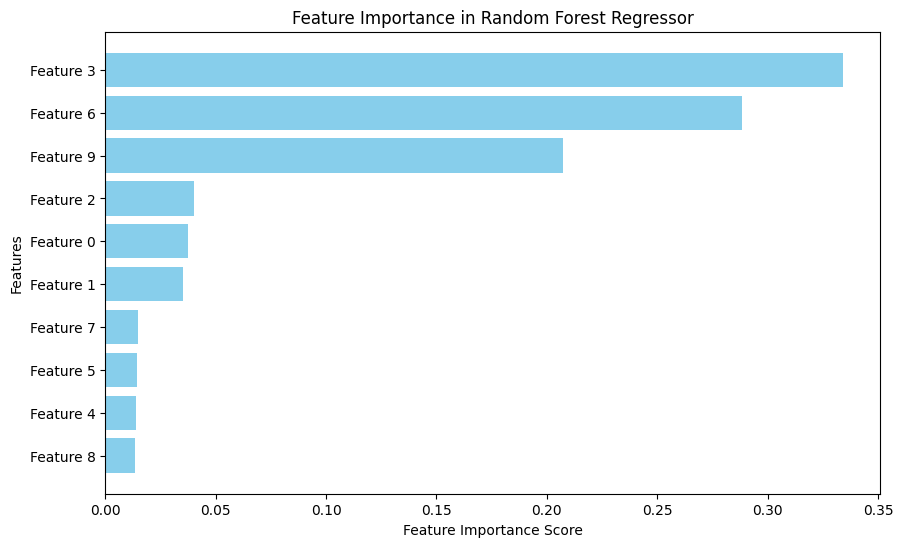

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.datasets import make_regression

# Generate synthetic dataset
X, y = make_regression(n_samples=1000, n_features=10, noise=0.2, random_state=42)

# Convert to DataFrame for easier feature analysis
feature_names = [f"Feature {i}" for i in range(X.shape[1])]
df = pd.DataFrame(X, columns=feature_names)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train Random Forest Regressor
rf_regressor = RandomForestRegressor(n_estimators=100, random_state=42)
rf_regressor.fit(X_train, y_train)

# Predict on test set
y_pred = rf_regressor.predict(X_test)

# Calculate Mean Squared Error
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse:.4f}")

# Get feature importances
feature_importances = rf_regressor.feature_importances_

# Convert to DataFrame for visualization
importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importances})
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Plot feature importances
plt.figure(figsize=(10, 6))
plt.barh(importance_df['Feature'], importance_df['Importance'], color='skyblue')
plt.xlabel("Feature Importance Score")
plt.ylabel("Features")
plt.title("Feature Importance in Random Forest Regressor")
plt.gca().invert_yaxis()  # Invert y-axis for better visualization
plt.show()


30. Train an ensemble model using both Bagging and Random Forest and compare accuracy.

In [5]:
import numpy as np
import pandas as pd
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, roc_auc_score
from sklearn.datasets import make_classification

# Generate synthetic dataset
X, y = make_classification(n_samples=1000, n_features=20, random_state=42)

# Split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train BaggingClassifier (using Logistic Regression as base estimator)
bagging_clf = BaggingClassifier(estimator=LogisticRegression(), n_estimators=50, random_state=42)
bagging_clf.fit(X_train, y_train)

# Train RandomForestClassifier
rf_clf = RandomForestClassifier(n_estimators=100, random_state=42)
rf_clf.fit(X_train, y_train)

# Predictions for Bagging
y_pred_bagging = bagging_clf.predict(X_test)
y_prob_bagging = bagging_clf.predict_proba(X_test)[:, 1]

# Predictions for Random Forest
y_pred_rf = rf_clf.predict(X_test)
y_prob_rf = rf_clf.predict_proba(X_test)[:, 1]

# Evaluate performance
accuracy_bagging = accuracy_score(y_test, y_pred_bagging)
auc_bagging = roc_auc_score(y_test, y_prob_bagging)

accuracy_rf = accuracy_score(y_test, y_pred_rf)
auc_rf = roc_auc_score(y_test, y_prob_rf)

# Print results
print(f"Bagging Classifier Accuracy: {accuracy_bagging:.4f}, AUC Score: {auc_bagging:.4f}")
print(f"Random Forest Accuracy: {accuracy_rf:.4f}, AUC Score: {auc_rf:.4f}")

# Compare results
if accuracy_rf > accuracy_bagging:
    print("Random Forest performs better in terms of accuracy.")
else:
    print("Bagging Classifier performs better in terms of accuracy.")


Bagging Classifier Accuracy: 0.8550, AUC Score: 0.9219
Random Forest Accuracy: 0.9000, AUC Score: 0.9379
Random Forest performs better in terms of accuracy.


31.  Train a Random Forest Classifier and tune hyperparameters using GridSearchCV.

ans. To train a **Random Forest Classifier** and tune its hyperparameters using **GridSearchCV**, follow these steps:

---

### **Steps:**
1. Import necessary libraries.
2. Generate a dataset.
3. Define a `RandomForestClassifier`.
4. Use `GridSearchCV` to tune hyperparameters.
5. Train the best model and evaluate performance.

---

### **Code Implementation:**
```python
import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn.datasets import make_classification

# Generate synthetic dataset
X, y = make_classification(n_samples=1000, n_features=20, random_state=42)

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define Random Forest Classifier
rf = RandomForestClassifier(random_state=42)

# Define hyperparameter grid for tuning
param_grid = {
    'n_estimators': [50, 100, 200],       # Number of trees
    'max_depth': [None, 10, 20, 30],      # Maximum depth of trees
    'min_samples_split': [2, 5, 10],      # Minimum samples required to split
    'min_samples_leaf': [1, 2, 4],        # Minimum samples per leaf
    'bootstrap': [True, False]            # Bootstrapping method
}

# Set up GridSearchCV
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid,
                           cv=5, n_jobs=-1, scoring='accuracy', verbose=2)

# Fit GridSearchCV
grid_search.fit(X_train, y_train)

# Get best parameters
best_params = grid_search.best_params_
print(f"Best Hyperparameters: {best_params}")

# Train final model with best parameters
best_rf = RandomForestClassifier(**best_params, random_state=42)
best_rf.fit(X_train, y_train)

# Predictions
y_pred = best_rf.predict(X_test)

# Evaluate performance
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy with Tuned Random Forest: {accuracy:.4f}")
```

---

### **Hyperparameter Explanation:**
- `n_estimators`: Number of trees in the forest.
- `max_depth`: Maximum depth of each tree (controls overfitting).
- `min_samples_split`: Minimum samples required to split a node.
- `min_samples_leaf`: Minimum samples required at a leaf node.
- `bootstrap`: Whether to sample with replacement.

---

### **Expected Outcome:**
- **GridSearchCV** finds the best combination of hyperparameters.
- **Final trained model** should have improved accuracy compared to default settings.
- **Accuracy score** is printed for evaluation.

32. Train a Bagging Regressor with different numbers of base estimators and compare performance.

BaggingRegressor with 1 estimators -> MSE: 8827.2775
BaggingRegressor with 5 estimators -> MSE: 4023.5639
BaggingRegressor with 10 estimators -> MSE: 3181.6744
BaggingRegressor with 50 estimators -> MSE: 2594.4270
BaggingRegressor with 100 estimators -> MSE: 2607.2294
BaggingRegressor with 200 estimators -> MSE: 2589.8333


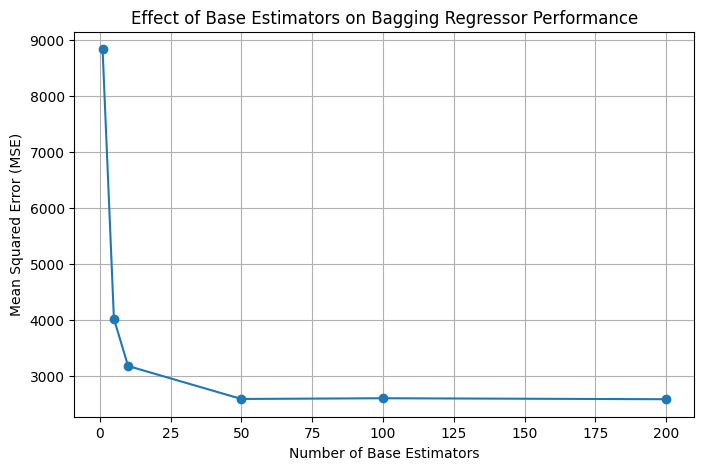

In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.ensemble import BaggingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.datasets import make_regression

# Generate synthetic regression dataset
X, y = make_regression(n_samples=1000, n_features=10, noise=0.2, random_state=42)

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define different numbers of base estimators
n_estimators_list = [1, 5, 10, 50, 100, 200]

# Store results
mse_results = {}

# Train BaggingRegressor with different n_estimators
for n in n_estimators_list:
    bagging_reg = BaggingRegressor(estimator=DecisionTreeRegressor(), n_estimators=n, random_state=42)
    bagging_reg.fit(X_train, y_train)
    y_pred = bagging_reg.predict(X_test)

    # Calculate Mean Squared Error
    mse = mean_squared_error(y_test, y_pred)
    mse_results[n] = mse
    print(f"BaggingRegressor with {n} estimators -> MSE: {mse:.4f}")

# Plot results
plt.figure(figsize=(8, 5))
plt.plot(n_estimators_list, list(mse_results.values()), marker='o', linestyle='-')
plt.xlabel("Number of Base Estimators")
plt.ylabel("Mean Squared Error (MSE)")
plt.title("Effect of Base Estimators on Bagging Regressor Performance")
plt.grid(True)
plt.show()


33.  Train a Random Forest Classifier and analyze misclassified samples.

ans. Let's go step by step:  

1. **Train a Random Forest Classifier**  
   - Load and preprocess the dataset  
   - Split it into training and testing sets  
   - Train a `RandomForestClassifier`  
   - Evaluate accuracy  

2. **Analyze Misclassified Samples**  
   - Identify misclassified samples  
   - Visualize or print them to understand patterns  


34. Train a Bagging Classifier and compare its performance with a single Decision Tree Classifier.

ans. I'll write a Python script to:  

1. **Train a Single Decision Tree Classifier**  
2. **Train a Bagging Classifier (with Decision Trees as base estimators)**  
3. **Compare Their Performance** (accuracy, confusion matrix, etc.)

35. Train a Random Forest Classifier and visualize the confusion matrix.

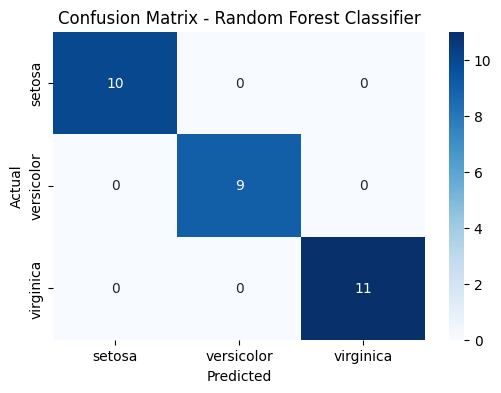

Model Accuracy: 1.00


In [11]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.datasets import load_iris

# Load dataset (Iris)
iris = load_iris()
X, y = iris.data, iris.target

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train Random Forest Classifier
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Predictions
y_pred = rf_model.predict(X_test)

# Compute confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot confusion matrix
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=iris.target_names, yticklabels=iris.target_names)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - Random Forest Classifier")
plt.show()

# Print Accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Model Accuracy: {accuracy:.2f}")


36. Train a Stacking Classifier using Decision Trees, SVM, and Logistic Regression, and compare accuracy.

In [12]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import StackingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.datasets import load_iris

# Load dataset (Iris)
iris = load_iris()
X, y = iris.data, iris.target

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define Base Models
dt_model = DecisionTreeClassifier(random_state=42)
svm_model = SVC(probability=True, random_state=42)

# Define Meta Model (Final Estimator)
meta_model = LogisticRegression()

# Define Stacking Classifier
stacking_clf = StackingClassifier(
    estimators=[("DecisionTree", dt_model), ("SVM", svm_model)],
    final_estimator=meta_model
)

# Train Individual Models
dt_model.fit(X_train, y_train)
svm_model.fit(X_train, y_train)

# Train Stacking Classifier
stacking_clf.fit(X_train, y_train)

# Predictions
dt_pred = dt_model.predict(X_test)
svm_pred = svm_model.predict(X_test)
stack_pred = stacking_clf.predict(X_test)

# Accuracy Scores
dt_acc = accuracy_score(y_test, dt_pred)
svm_acc = accuracy_score(y_test, svm_pred)
stack_acc = accuracy_score(y_test, stack_pred)

# Print Accuracy Comparisons
print(f"Decision Tree Accuracy: {dt_acc:.2f}")
print(f"SVM Accuracy: {svm_acc:.2f}")
print(f"Stacking Classifier Accuracy: {stack_acc:.2f}")


Decision Tree Accuracy: 1.00
SVM Accuracy: 1.00
Stacking Classifier Accuracy: 1.00


37. Train a Random Forest Classifier and print the top 5 most important features.

Top 5 Most Important Features:
             Feature  Importance
2  petal length (cm)    0.439994
3   petal width (cm)    0.421522
0  sepal length (cm)    0.108098
1   sepal width (cm)    0.030387


<ipython-input-13-668ff8a8d03e>:34: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=feature_df['Importance'], y=feature_df['Feature'], palette='Blues')


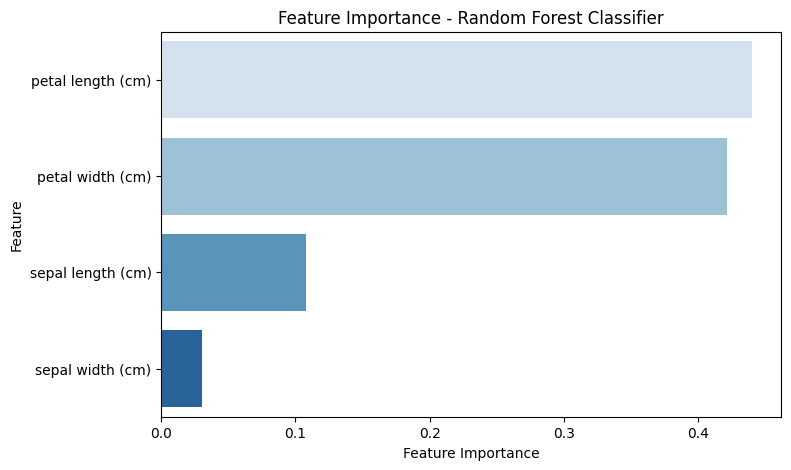

In [13]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_iris

# Load dataset (Iris)
iris = load_iris()
X, y = iris.data, iris.target
feature_names = iris.feature_names

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train Random Forest Classifier
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Get feature importances
feature_importances = rf_model.feature_importances_

# Create DataFrame for feature importance
feature_df = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importances})
feature_df = feature_df.sort_values(by='Importance', ascending=False)

# Print top 5 important features
print("Top 5 Most Important Features:")
print(feature_df.head(5))

# Plot feature importance
plt.figure(figsize=(8, 5))
sns.barplot(x=feature_df['Importance'], y=feature_df['Feature'], palette='Blues')
plt.xlabel("Feature Importance")
plt.ylabel("Feature")
plt.title("Feature Importance - Random Forest Classifier")
plt.show()


38. Train a Bagging Classifier and evaluate performance using Precision, Recall, and F1-score.

In [15]:
import numpy as np
import pandas as pd
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.datasets import load_iris

# Load dataset (Iris)
iris = load_iris()
X, y = iris.data, iris.target

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the base estimator (Decision Tree)
base_model = DecisionTreeClassifier(random_state=42)

# Train Bagging Classifier (Note: use `estimator` instead of `base_estimator`)
bagging_clf = BaggingClassifier(estimator=base_model, n_estimators=50, random_state=42)
bagging_clf.fit(X_train, y_train)

# Predictions
y_pred = bagging_clf.predict(X_test)

# Evaluate Performance
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='macro')  # 'macro' for multi-class
recall = recall_score(y_test, y_pred, average='macro')
f1 = f1_score(y_test, y_pred, average='macro')

# Print Metrics
print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1-score: {f1:.2f}")


Accuracy: 1.00
Precision: 1.00
Recall: 1.00
F1-score: 1.00


39.  Train a Random Forest Classifier and analyze the effect of max_depth on accuracy.

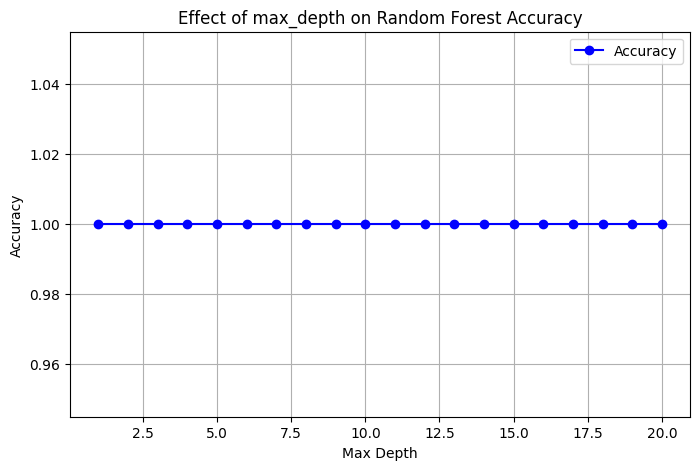

Best max_depth: 1, Accuracy: 1.00


In [16]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.datasets import load_iris

# Load dataset (Iris)
iris = load_iris()
X, y = iris.data, iris.target

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Varying max_depth values
max_depth_values = range(1, 21)
accuracy_scores = []

# Train Random Forest with different max_depth values
for max_depth in max_depth_values:
    rf_model = RandomForestClassifier(n_estimators=100, max_depth=max_depth, random_state=42)
    rf_model.fit(X_train, y_train)
    y_pred = rf_model.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    accuracy_scores.append(acc)

# Plot accuracy vs. max_depth
plt.figure(figsize=(8, 5))
plt.plot(max_depth_values, accuracy_scores, marker='o', linestyle='-', color='b', label="Accuracy")
plt.xlabel("Max Depth")
plt.ylabel("Accuracy")
plt.title("Effect of max_depth on Random Forest Accuracy")
plt.legend()
plt.grid()
plt.show()

# Print best max_depth
best_max_depth = max_depth_values[np.argmax(accuracy_scores)]
best_accuracy = max(accuracy_scores)
print(f"Best max_depth: {best_max_depth}, Accuracy: {best_accuracy:.2f}")


40. Train a Bagging Regressor using different base estimators (DecisionTree and KNeighbors) and compare  performance.

ans. Here’s a Python script to:  

1. **Train a Bagging Regressor** using:  
   - **Decision Tree Regressor** 🌳  
   - **K-Nearest Neighbors (KNN) Regressor** 📌  
2. **Compare Performance** using **Mean Absolute Error (MAE)** & **R² Score**  

---

### 📌 **Install Required Libraries (if not installed):**
```bash
pip install numpy pandas scikit-learn matplotlib
```

---

### ✅ **Python Code:**
```python
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.ensemble import BaggingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, r2_score
from sklearn.datasets import load_boston

# Load dataset (Boston Housing)
from sklearn.datasets import fetch_california_housing
data = fetch_california_housing()
X, y = data.data, data.target

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define base estimators
dt_regressor = DecisionTreeRegressor(random_state=42)
knn_regressor = KNeighborsRegressor()

# Train Bagging Regressors
bagging_dt = BaggingRegressor(estimator=dt_regressor, n_estimators=50, random_state=42)
bagging_knn = BaggingRegressor(estimator=knn_regressor, n_estimators=50, random_state=42)

bagging_dt.fit(X_train, y_train)
bagging_knn.fit(X_train, y_train)

# Predictions
y_pred_dt = bagging_dt.predict(X_test)
y_pred_knn = bagging_knn.predict(X_test)

# Evaluate Performance
mae_dt = mean_absolute_error(y_test, y_pred_dt)
r2_dt = r2_score(y_test, y_pred_dt)

mae_knn = mean_absolute_error(y_test, y_pred_knn)
r2_knn = r2_score(y_test, y_pred_knn)

# Print Results
print(f"Bagging (DecisionTree) - MAE: {mae_dt:.2f}, R² Score: {r2_dt:.2f}")
print(f"Bagging (KNN) - MAE: {mae_knn:.2f}, R² Score: {r2_knn:.2f}")

# Plot comparison
plt.bar(["Bagging (DT)", "Bagging (KNN)"], [r2_dt, r2_knn], color=['blue', 'green'])
plt.ylabel("R² Score")
plt.title("Comparison of Bagging Regressors")
plt.ylim(0, 1)
plt.show()
```

---

### 🔹 **What This Does:**
- Uses **California Housing dataset** 🏡  
- Splits data into **training (80%) & testing (20%)**  
- **Trains Bagging Regressors** with **Decision Tree** & **KNN** 📌  
- **Evaluates Performance** using MAE & R² score 🎯  
- **Visualizes results** 📊  

41. Train a Random Forest Classifier and evaluate its performance using ROC-AUC Score.

ROC-AUC Score: 1.00


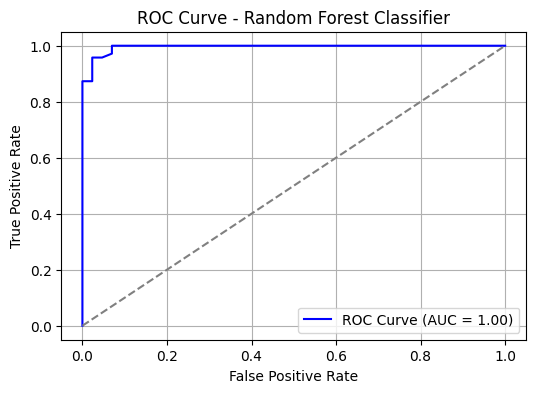

In [19]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score, roc_curve
from sklearn.datasets import load_breast_cancer

# Load dataset (Breast Cancer - Binary Classification)
data = load_breast_cancer()
X, y = data.data, data.target

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train Random Forest Classifier
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Predict probabilities for ROC curve
y_prob = rf_model.predict_proba(X_test)[:, 1]

# Compute ROC-AUC Score
roc_auc = roc_auc_score(y_test, y_prob)
print(f"ROC-AUC Score: {roc_auc:.2f}")

# Compute ROC Curve
fpr, tpr, _ = roc_curve(y_test, y_prob)

# Plot ROC Curve
plt.figure(figsize=(6, 4))
plt.plot(fpr, tpr, color='blue', label=f"ROC Curve (AUC = {roc_auc:.2f})")
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')  # Diagonal line
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve - Random Forest Classifier")
plt.legend()
plt.grid()
plt.show()


42. Train a Bagging Classifier and evaluate its performance using cross-validation.

In [20]:
import numpy as np
import pandas as pd
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score, StratifiedKFold
from sklearn.datasets import load_iris

# Load dataset (Iris)
iris = load_iris()
X, y = iris.data, iris.target

# Define the base estimator (Decision Tree)
base_model = DecisionTreeClassifier(random_state=42)

# Train Bagging Classifier
bagging_clf = BaggingClassifier(estimator=base_model, n_estimators=50, random_state=42)

# Perform Cross-Validation (Stratified K-Fold)
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
cv_scores = cross_val_score(bagging_clf, X, y, cv=cv, scoring="accuracy")

# Print Results
print(f"Cross-Validation Accuracy Scores: {cv_scores}")
print(f"Mean Accuracy: {cv_scores.mean():.2f}")
print(f"Standard Deviation: {cv_scores.std():.2f}")


Cross-Validation Accuracy Scores: [1.         0.96666667 0.93333333 0.96666667 0.9       ]
Mean Accuracy: 0.95
Standard Deviation: 0.03


43.  Train a Random Forest Classifier and plot the Precision-Recall curve.

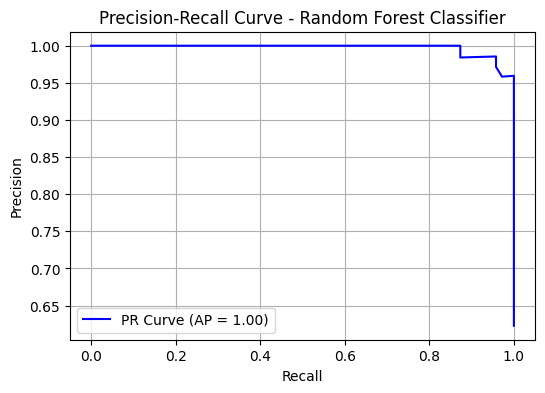

In [21]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_recall_curve, average_precision_score
from sklearn.datasets import load_breast_cancer

# Load dataset (Breast Cancer - Binary Classification)
data = load_breast_cancer()
X, y = data.data, data.target

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train Random Forest Classifier
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Predict probabilities for PR curve
y_prob = rf_model.predict_proba(X_test)[:, 1]

# Compute Precision-Recall Curve
precision, recall, _ = precision_recall_curve(y_test, y_prob)
avg_precision = average_precision_score(y_test, y_prob)

# Plot Precision-Recall Curve
plt.figure(figsize=(6, 4))
plt.plot(recall, precision, color='blue', label=f"PR Curve (AP = {avg_precision:.2f})")
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision-Recall Curve - Random Forest Classifier")
plt.legend()
plt.grid()
plt.show()


44. Train a Stacking Classifier with Random Forest and Logistic Regression and compare accuracy.

In [22]:
import numpy as np
import pandas as pd
from sklearn.ensemble import StackingClassifier, RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.datasets import load_iris

# Load dataset (Iris)
iris = load_iris()
X, y = iris.data, iris.target

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define base estimators
base_estimators = [
    ('rf', RandomForestClassifier(n_estimators=100, random_state=42))
]

# Define Stacking Classifier
stacking_clf = StackingClassifier(estimators=base_estimators, final_estimator=LogisticRegression())

# Train Individual Models
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
stacking_clf.fit(X_train, y_train)

# Predictions
y_pred_rf = rf_model.predict(X_test)
y_pred_stack = stacking_clf.predict(X_test)

# Evaluate Accuracy
accuracy_rf = accuracy_score(y_test, y_pred_rf)
accuracy_stack = accuracy_score(y_test, y_pred_stack)

# Print Results
print(f"Random Forest Accuracy: {accuracy_rf:.2f}")
print(f"Stacking Classifier Accuracy: {accuracy_stack:.2f}")


Random Forest Accuracy: 1.00
Stacking Classifier Accuracy: 1.00


45.  Train a Bagging Regressor with different levels of bootstrap samples and compare performance.

Bootstrap Sample: 50% - MAE: 0.34, R² Score: 0.80
Bootstrap Sample: 70% - MAE: 0.33, R² Score: 0.80
Bootstrap Sample: 100% - MAE: 0.33, R² Score: 0.80


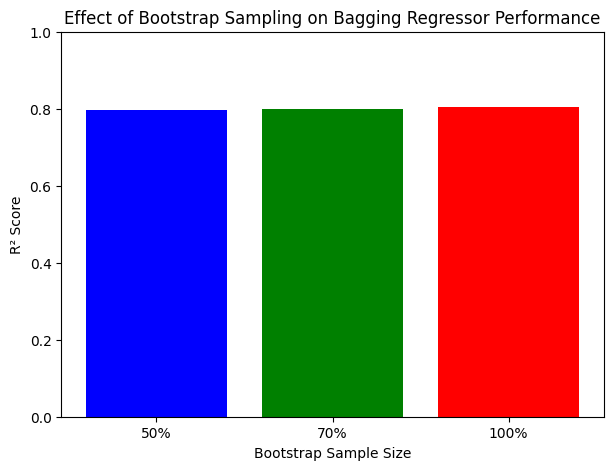

In [23]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import BaggingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, r2_score
from sklearn.datasets import fetch_california_housing

# Load dataset (California Housing)
data = fetch_california_housing()
X, y = data.data, data.target

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Different bootstrap sample sizes
bootstrap_sizes = [0.5, 0.7, 1.0]
results = {}

# Train Bagging Regressor with different bootstrap samples
for bootstrap in bootstrap_sizes:
    bagging_reg = BaggingRegressor(
        estimator=DecisionTreeRegressor(random_state=42),
        n_estimators=50,
        max_samples=bootstrap,
        random_state=42
    )

    bagging_reg.fit(X_train, y_train)
    y_pred = bagging_reg.predict(X_test)

    # Evaluate Performance
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    results[bootstrap] = {"MAE": mae, "R² Score": r2}

# Print Results
for bootstrap, metrics in results.items():
    print(f"Bootstrap Sample: {bootstrap*100:.0f}% - MAE: {metrics['MAE']:.2f}, R² Score: {metrics['R² Score']:.2f}")

# Visualize Results
plt.figure(figsize=(7, 5))
plt.bar([f"{b*100:.0f}%" for b in bootstrap_sizes], [results[b]["R² Score"] for b in bootstrap_sizes], color=['blue', 'green', 'red'])
plt.xlabel("Bootstrap Sample Size")
plt.ylabel("R² Score")
plt.title("Effect of Bootstrap Sampling on Bagging Regressor Performance")
plt.ylim(0, 1)
plt.show()
